---
DEEP REINFORCEMENT LEARNING EXPLAINED - 20
# **RL frameworks**
### RLlib: Scalable Reinforcement Learning using Ray
---


Installing ray package and uninstall pyarrow: We must **restart the runtime**

In [ ]:
#Installing all the dependences
!pip uninstall -y pyarrow  > /dev/null
#!pip install ray[debug]==0.7.5  > /dev/null 2>&1
! pip install -U ray[rllib] &> /dev/null
!pip install bs4  > /dev/null 2>&1

import os
os._exit(0)


Import packages

In [1]:
import gym
import numpy as np
from matplotlib import pyplot as plt

env = gym.make('CartPole-v0')

import gym
import ray

from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Configuration image rendering in colab

# Taken from https://towardsdatascience.com/rendering-openai-gym-envs-on-binder-and-google-colab-536f99391cc7

!apt-get install -y xvfb x11-utils &> /dev/null
!pip install pyvirtualdisplay==0.2.*  PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.* &> /dev/null
!pip install gym[box2d]==0.17.* &> /dev/null

# Taken from https://github.com/actions/virtual-environments/issues/214
!sudo apt-get update  &> /dev/null 
!sudo apt-get install xvfb --fix-missing &> /dev/null

import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
_ = _display.start()

!echo $DISPLAY # sanity checking: should be set to some value (e.g. 1005)

from IPython import display

:1007


Start up Ray

In [3]:
ray.init()

2020-09-27 14:20:13,116	INFO resource_spec.py:231 -- Starting Ray with 7.13 GiB memory available for workers and up to 3.59 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-27 14:20:13,676	INFO services.py:1193 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '172.28.0.2',
 'object_store_address': '/tmp/ray/session_2020-09-27_14-20-13_113598_2383/sockets/plasma_store',
 'raylet_ip_address': '172.28.0.2',
 'raylet_socket_name': '/tmp/ray/session_2020-09-27_14-20-13_113598_2383/sockets/raylet',
 'redis_address': '172.28.0.2:6379',
 'session_dir': '/tmp/ray/session_2020-09-27_14-20-13_113598_2383',
 'webui_url': 'localhost:8265'}


Instantiate a `PPOTrainer` object

In [5]:
config = DEFAULT_CONFIG.copy()
config["num_gpus"] = 1 # in order to use the GPU

agent = PPOTrainer(config, 'CartPole-v0')

2020-09-27 14:20:17,229	INFO trainer.py:605 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2020-09-27 14:20:17,235	INFO trainer.py:632 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-09-27 14:20:17,363	WARNING worker.py:1134 -- The dashboard on node ae61824d078c failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1062, in create_server
    sock.bind(sa)
OSError: [Errno 99] Cannot assign requested address

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/ray/dashboard/dashboard.py", line 961, in <module>
    dashboard.run()
  File "/usr/local/lib/python3.6/dist-packages/ray/dashboard/dashboard.py", line 576, in run
    aiohttp.web.run_app(self.app, host=self.host, port=self.port)
  File "/usr/local/lib/python

In [6]:
print(DEFAULT_CONFIG)

{'num_workers': 2, 'num_envs_per_worker': 1, 'rollout_fragment_length': 200, 'sample_batch_size': -1, 'batch_mode': 'truncate_episodes', 'num_gpus': 0, 'train_batch_size': 4000, 'model': {'conv_filters': None, 'conv_activation': 'relu', 'fcnet_activation': 'tanh', 'fcnet_hiddens': [256, 256], 'free_log_std': False, 'no_final_linear': False, 'vf_share_layers': True, 'use_lstm': False, 'max_seq_len': 20, 'lstm_cell_size': 256, 'lstm_use_prev_action_reward': False, 'state_shape': None, 'framestack': True, 'dim': 84, 'grayscale': False, 'zero_mean': True, 'custom_model': None, 'custom_model_config': {}, 'custom_action_dist': None, 'custom_preprocessor': None, 'custom_options': -1}, 'optimizer': {}, 'gamma': 0.99, 'horizon': None, 'soft_horizon': False, 'no_done_at_end': False, 'env_config': {}, 'env': None, 'normalize_actions': False, 'clip_rewards': None, 'clip_actions': True, 'preprocessor_pref': 'deepmind', 'lr': 5e-05, 'monitor': False, 'log_level': 'WARN', 'callbacks': <class 'ray.rll

Watch Agent before training using `compute_action()`

Reward: 17.0


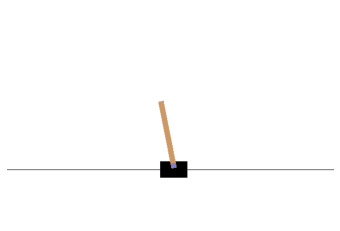

In [7]:
def watch_agent(env):
  state = env.reset()
  rewards = []
  img = plt.imshow(env.render(mode='rgb_array'))
  for t in range(2000):
    action=agent.compute_action(state)

    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)

    state, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done:
        print("Reward:", sum([r for r in rewards]))
        break 
  env.close()

watch_agent(env)
watch_agent(env)

Train

In [8]:
for i in range(10):
  result = agent.train()
  print(f'Mean reward: {result["episode_reward_mean"]:4.1f}')

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.
Mean reward: 23.1


(pid=3158) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/ray/rllib/policy/tf_policy.py:871: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=3158) Instructions for updating:
(pid=3158) Prefer Variable.assign which has equivalent behavior in 2.X.
(pid=3159) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/ray/rllib/policy/tf_policy.py:871: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=3159) Instructions for updating:
(pid=3159) Prefer Variable.assign which has equivalent behavior in 2.X.


Mean reward: 40.5
Mean reward: 66.7
Mean reward: 95.9
Mean reward: 126.2
Mean reward: 157.3
Mean reward: 171.9
Mean reward: 188.7
Mean reward: 192.7
Mean reward: 197.7


Reward: 200.0


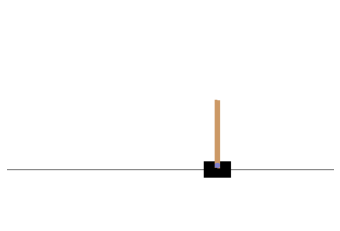

In [9]:
watch_agent(env)